In [1121]:
import pandas as pd
import numpy as np
from math import sqrt
import warnings
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import random
import io
import warnings
warnings.filterwarnings('ignore')

# Loding Data Set

In [1122]:
df=pd.read_csv("breast-cancer-wisconsin.data", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [1123]:
df.shape

(699, 11)

# EDA 

In [1124]:
# We Do not have any information regarding the attributes of the dataset so tried to fetch the information 
# from Machine learning Repository
# Reference link: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Original)

In [ ]:
""" Relavant information Regarding Dataset 
  
  Number of Attributes: 10 plus the class attribute
  
  Attribute Information: (class attribute has been moved to last column)

   #  Attribute                     Domain
   -- -----------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
  10. Mitoses                       1 - 10
  11. Class:                        (2 for benign, 4 for malignant) 

# Adding Column names 

In [1125]:
df.columns = ['id','Clump_thickness','Uniformity_of_cellsize','uniformity_of_cellshape','Marginal_adhesion','Single_epithelain_cellsize',
        'Bare_nuclei','Bland_chromatin','Nornal_Nucleli','Mitoses','Class']

In [1126]:
df.head()

,id,Clump_thickness,Uniformity_of_cellsize,uniformity_of_cellshape,Marginal_adhesion,Single_epithelain_cellsize,Bare_nuclei,Bland_chromatin,Nornal_Nucleli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [1127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id                            699 non-null int64
Clump_thickness               699 non-null int64
Uniformity_of_cellsize        699 non-null int64
uniformity_of_cellshape       699 non-null int64
Marginal_adhesion             699 non-null int64
Single_epithelain_cellsize    699 non-null int64
Bare_nuclei                   699 non-null object
Bland_chromatin               699 non-null int64
Nornal_Nucleli                699 non-null int64
Mitoses                       699 non-null int64
Class                         699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [1128]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
Clump_thickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Uniformity_of_cellsize,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
uniformity_of_cellshape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal_adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single_epithelain_cellsize,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Bland_chromatin,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Nornal_Nucleli,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


# Checking for Null Values

In [1129]:
df.isnull().sum()

id                            0
Clump_thickness               0
Uniformity_of_cellsize        0
uniformity_of_cellshape       0
Marginal_adhesion             0
Single_epithelain_cellsize    0
Bare_nuclei                   0
Bland_chromatin               0
Nornal_Nucleli                0
Mitoses                       0
Class                         0
dtype: int64

In [1130]:
df.nunique()

id                            645
Clump_thickness                10
Uniformity_of_cellsize         10
uniformity_of_cellshape        10
Marginal_adhesion              10
Single_epithelain_cellsize     10
Bare_nuclei                    11
Bland_chromatin                10
Nornal_Nucleli                 10
Mitoses                         9
Class                           2
dtype: int64

In [1131]:
df.drop(['id'],axis=1,inplace=True)

In [1132]:
# Hence id is a unique value for all the customers visited for the cancer test, so removig the ID column for the dataset

# Checking for Missing Values

In [1133]:
for i in df:
    x=df[i].unique()
    print(x,i)

[ 5  3  6  4  8  1  2  7 10  9] Clump_thickness
[ 1  4  8 10  2  3  7  5  6  9] Uniformity_of_cellsize
[ 1  4  8 10  2  3  5  6  7  9] uniformity_of_cellshape
[ 1  5  3  8 10  4  6  2  9  7] Marginal_adhesion
[ 2  7  3  1  6  4  5  8 10  9] Single_epithelain_cellsize
['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6'] Bare_nuclei
[ 3  9  1  2  4  5  7  8  6 10] Bland_chromatin
[ 1  2  7  4  5  3 10  6  9  8] Nornal_Nucleli
[ 1  5  4  2  3  7 10  8  6] Mitoses
[2 4] Class


In [1020]:
# here in the Bare_nuclei Attribute we are having the missing data replaced with ?

In [1136]:
df['Bare_nuclei'].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare_nuclei, dtype: int64

In [1137]:
# there are 16 missing values replaced with ? , so replacing this ? with a constant 

In [1138]:
df.replace('?',-9999,inplace=True)

In [1139]:
df.head()

,Clump_thickness,Uniformity_of_cellsize,uniformity_of_cellshape,Marginal_adhesion,Single_epithelain_cellsize,Bare_nuclei,Bland_chromatin,Nornal_Nucleli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [1140]:
df.shape

(699, 10)

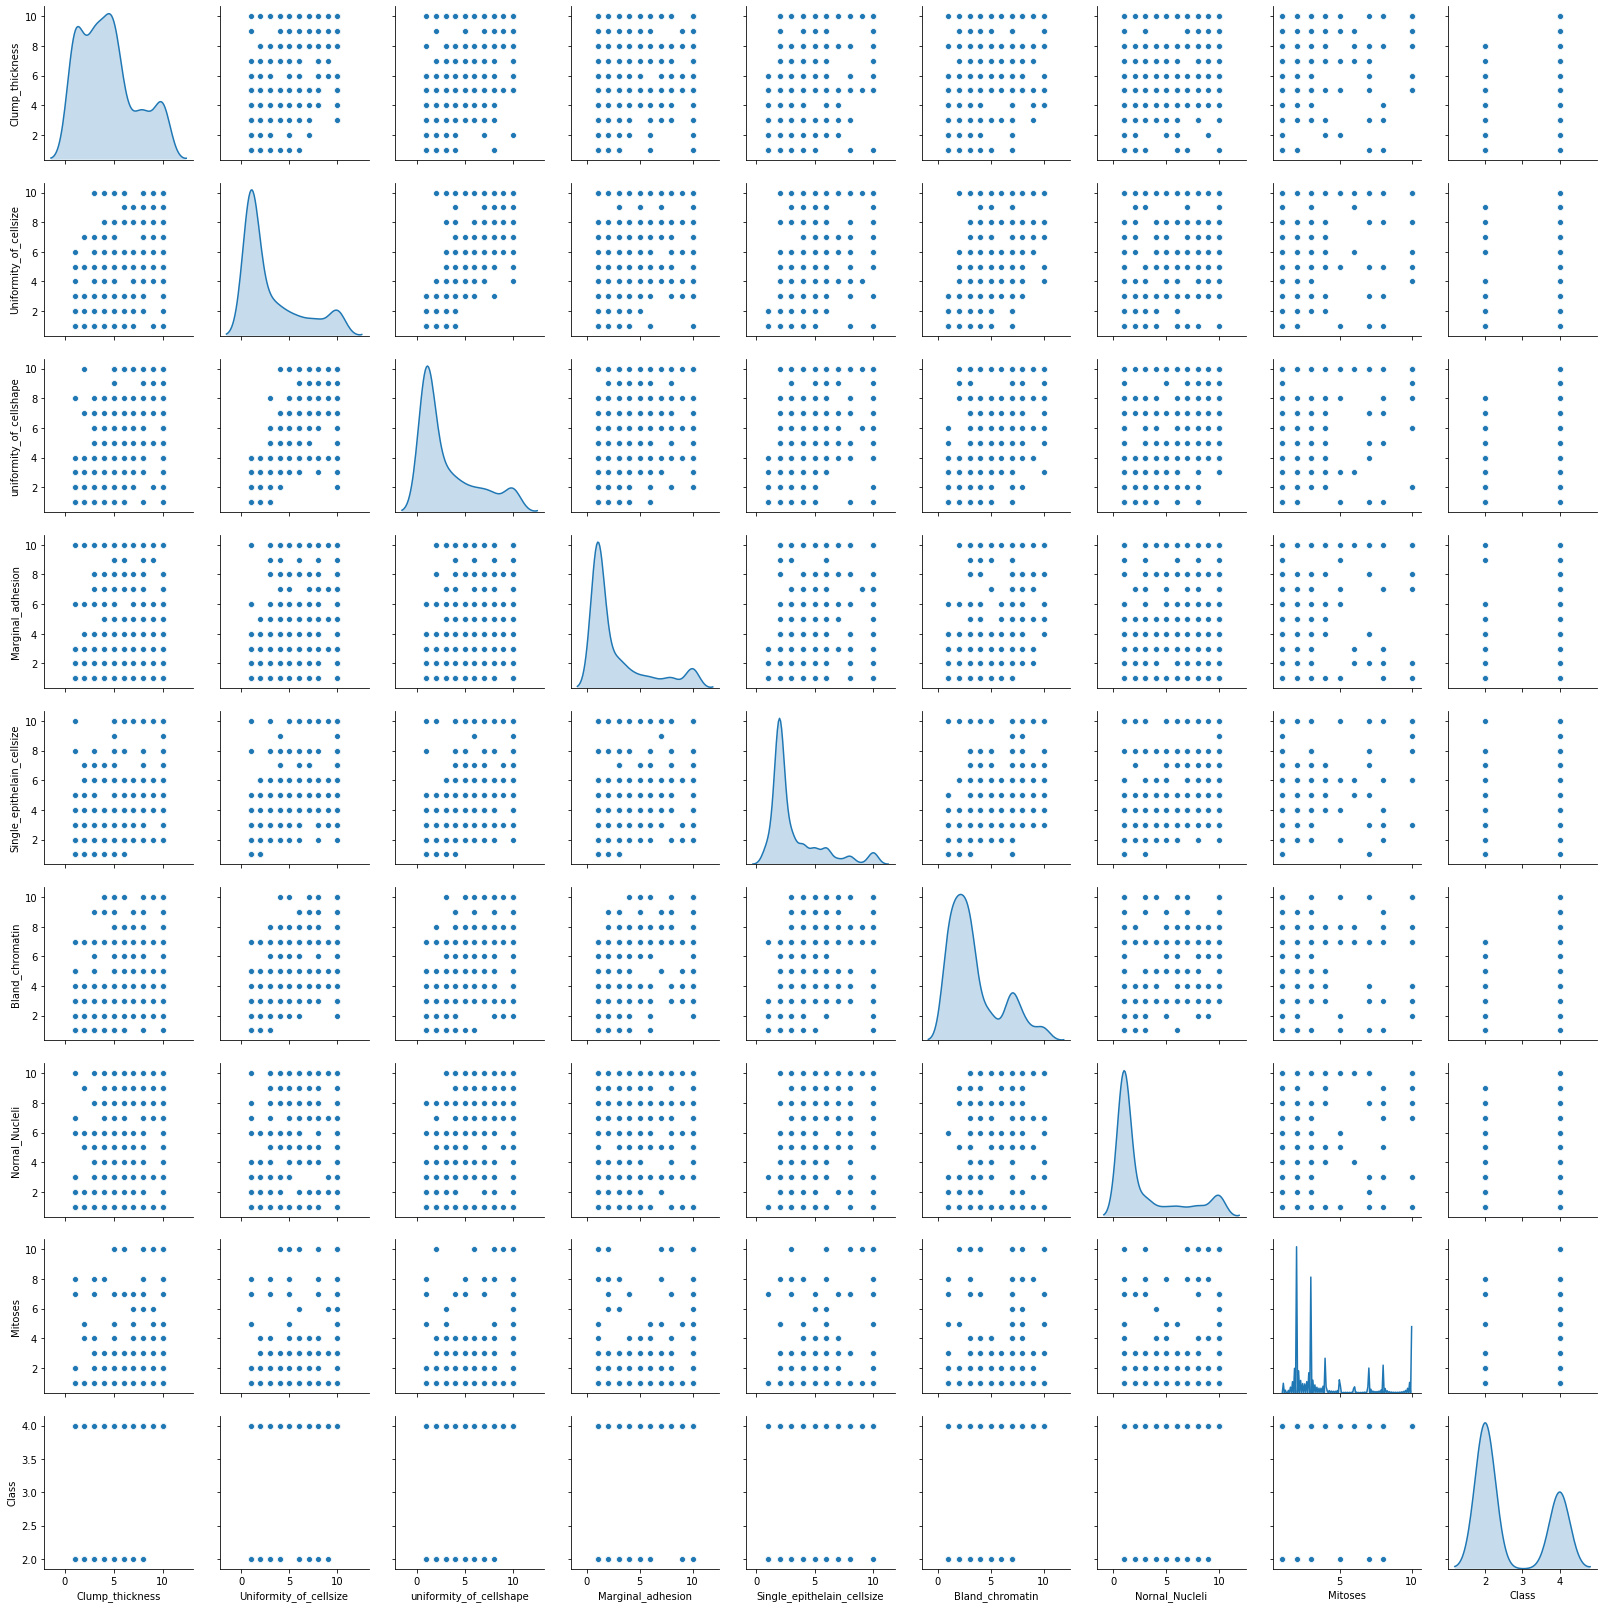

In [1023]:
sns.pairplot(df,diag_kind='kde')
plt.show()

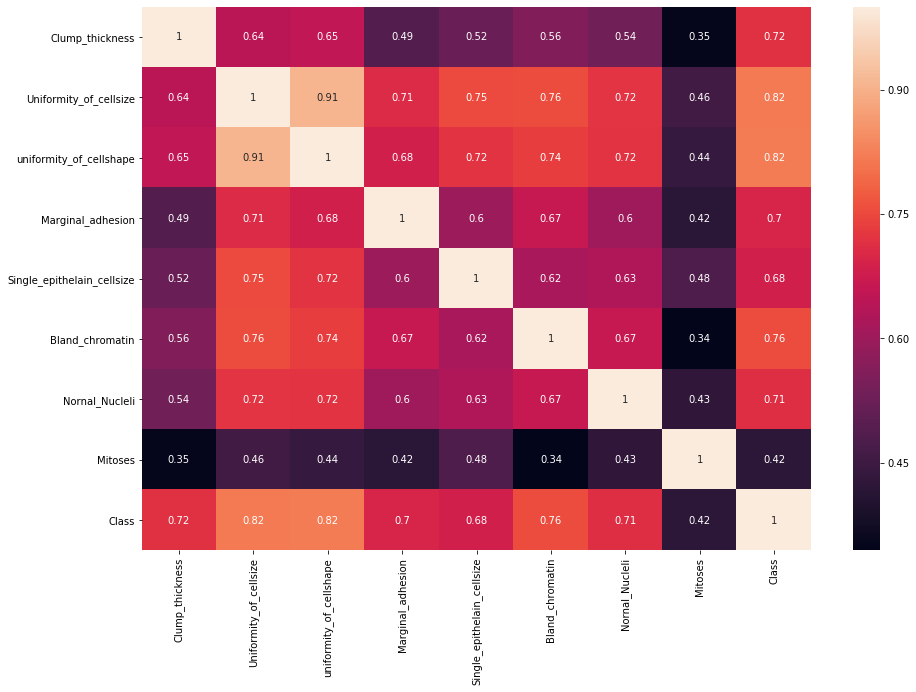

In [1027]:
plt.figure(figsize = (15,10))
corr = df.corr()
sns.heatmap(corr , annot =True)
plt.show()

# Splitting Data to Train and test data

In [1142]:
from collections import Counter
df['Bare_nuclei']=df['Bare_nuclei'].astype(int)

In [1143]:
def split_train_valid_test(data,test_ratio):
    shuffled_indcies=np.random.permutation(len(data))
    test_set_size= int(len(data)*test_ratio)
    test_indcies=shuffled_indcies[:test_set_size]
    train_indices=shuffled_indcies[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indcies]

In [1144]:
train_set,test_set=split_train_valid_test(df,test_ratio=0.2)
print('lenghth of Trainig set : ',len(train_set))
print('lenghth of Testing set : ',len(test_set))

lenghth of Trainig set :  560
lenghth of Testing set :  139


# Custom KNN without SKlearn - Simple Model

In [1145]:
train=train_set.astype(float).values.tolist()
test=test_set.astype(float).values.tolist()

In [1146]:
training_set={2:[],4:[]}
testing_set={2:[],4:[]}

In [1147]:
for i in train:
    training_set[i[-1]].append(i[:-1])
for i in test:
    testing_set[i[-1]].append(i[:-1])

In [1148]:
from functools import wraps
from time import time
import time

def knn(data,predict,k=5):
    if len(data) >=k:
        warnings.warn('change the k value')
    distances = []
    for group in data:
        for features in data[group]:
            euclidean_distance= np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_distance,group])
    votes = [i[1] for i in sorted(distances)[:k]]
    #print(Counter(votes).most_common(1)) # For Predictions
    vote_result=Counter(votes).most_common(1)[0][0]
    return vote_result

In [1035]:
start = time.time()

correct=0
total=0
for group in testing_set:
    for data in testing_set[group]:
        vote = knn(training_set,data,k=5)
        if group==vote:
            correct +=1
        total +=1
print('Model Accuracy:',correct/total )

end = time.time()
time_taken = end - start
print('Time: ',time_taken)

Model Accuracy: 0.9784172661870504
Time:  0.4537849426269531


# Custom KNN without SKlearn - Using Class

In [1050]:
def split_train_valid_test(data,test_ratio):
    shuffled_indcies=np.random.permutation(len(data))
    test_set_size= int(len(data)*test_ratio)
    test_indcies=shuffled_indcies[:test_set_size]
    train_indices=shuffled_indcies[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indcies]

In [1051]:
train_set,test_set=split_train_valid_test(df,test_ratio=0.2)
print('lenghth of Trainig set : ',len(train_set))
print('lenghth of Testing set : ',len(test_set))

lenghth of Trainig set :  560
lenghth of Testing set :  139


In [1052]:
X_train=np.array(train_set.drop(['Class'],axis =1))
y_train=np.array(train_set['Class'])
X_test=np.array(test_set.drop(['Class'],axis =1))
y_test=np.array(test_set['Class'])

In [1053]:
class KNNClassifier(object):

    def __init__(self):
        pass
    
    #"training" function
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    #predict function, output of this function is linked to main function to predict the testdata
    def predict(self, X_test, k=5):
        distances = self.compute_distances(self.X_train, X_test)
        vote_results = []
        for i in range(len(distances)):
            votesOneSample = []
            for j in range(k):
                votesOneSample.append(distances[i][j][1])
            vote_results.append(Counter(votesOneSample).most_common(1)[0][0])
        
        return vote_results
    
#For each sample and every item in test set algorithm is making tuple in distance list
#this is how list looks =>> distances = [[[distance, class],[distance, class],[distance, class],[distance, class]]]
#it will caluclate distances and sort them accordingly 

    def compute_distances(self, X, X_test):
        distances = []
        for i in range(X_test.shape[0]):
            euclidian_distances = np.zeros(X.shape[0])
            oneSampleList = []
            for j in range(len(X)):
                euclidian_distances[j] = np.sqrt(np.sum(np.square(np.array(X_test[i]) - np.array(X[j]))))
                oneSampleList.append([euclidian_distances[j], self.y_train[j]])
            distances.append(sorted(oneSampleList))
        return distances

In [1054]:
def accuracy(y_tes, y_pred):
    correct = 0
    for i in range(len(y_pred)):
        if(y_tes[i] == y_pred[i]):
            correct += 1
    return (correct/len(y_tes))*100

In [1055]:
def run():
    classifier = KNNClassifier()
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print("My KNN accuracy: ",accuracy(y_test, y_pred),'%')

In [1056]:
start = time.time()

run()

end = time.time()
time_taken = end - start
print('Time Taken : ',time_taken)


My KNN accuracy:  97.84172661870504 %
Time Taken :  0.6013936996459961


# Checking Accuracy and Time with KNN - SKlearn

In [1057]:
from sklearn.neighbors import KNeighborsClassifier

In [1058]:
df['newclass']=np.nan
for i in range(len(df['Class'])):
    if df['Class'].iloc[i] == 2:
        df['newclass'].iloc[i] = 0 
    else:
        df['newclass'].iloc[i] = 1

In [1059]:
# changing in to binary class for getting better metrics

In [1060]:
df['newclass']=df['newclass'].astype('category')
X=df.drop(['Class','newclass'],axis =1)
y=df['newclass']

In [1061]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X,y, test_size=0.3, random_state=0)

In [1062]:
from sklearn.neighbors import KNeighborsClassifier
start = time.time()

knn = KNeighborsClassifier(n_neighbors =5)
knn.fit(X_train1,y_train1)
y_pred = knn.predict(X_test1)
print('With KNN (K=5) test accuracy is: ',knn.score(X_test1,y_test1))

end = time.time()
time_taken = end - start
print('Time: ',time_taken)

With KNN (K=5) test accuracy is:  0.9666666666666667
Time:  0.012965679168701172


In [ ]:
# custom model is better at accuracy and lagging for time taking.

# Null Accuracy

In [1063]:
df.Class.value_counts()

2    458
4    241
Name: Class, dtype: int64

In [1064]:
Percent_value_counts = pd.DataFrame(data={
            'Count':df.Class.value_counts(),
            '% of Total': (df.Class.value_counts()/(len(df))*100)
            }).sort_values('Count', ascending=False)
Percent_value_counts

,Count,% of Total
2,458,65.522175
4,241,34.477825


In [1065]:
# SO our baseline accuracy or Null accuracy is 65.52 % 

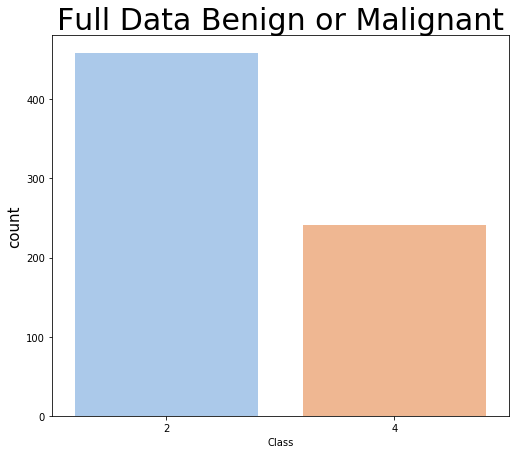

In [1149]:
plt.rcParams['figure.figsize'] = (18, 7)
plt.subplot(1, 2, 1)
sns.countplot(df['Class'], palette = 'pastel')
plt.title('Full Data Benign or Malignant', fontsize = 30)
plt.ylabel('count', fontsize = 15)
plt.show()

In [1067]:
# Trainig Data

In [1068]:
unique,count= np.unique(y_train,return_counts=True)
y_train_values={k:v for(k,v) in zip(unique,count)}
y_train_values

{2: 362, 4: 198}

In [1069]:
yy=pd.DataFrame(y_train)

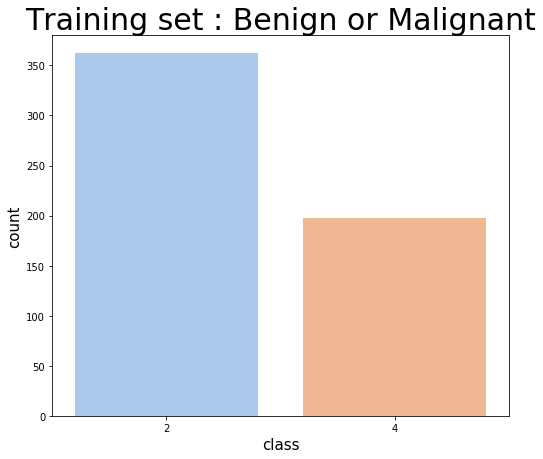

In [1077]:
plt.rcParams['figure.figsize'] = (18, 7)
plt.subplot(1, 2, 1)
sns.countplot(yy[0], palette = 'pastel')
plt.title('Training set : Benign or Malignant', fontsize = 30)
plt.xlabel('class', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.show()

In [1083]:
Percent_value_counts = pd.DataFrame(data={
            'Count':yy[0].value_counts(),
            '% of Total': (yy[0].value_counts()/(len(yy))*100)
            }).sort_values('Count', ascending=False)
Percent_value_counts

,Count,% of Total
2,362,64.642857
4,198,35.357143


In [1084]:
# In training set the Base line ACCURACY is 64.64

# SMOTE MODEL for Balancing the data

In [1085]:
from imblearn.over_sampling import SMOTE 

In [1150]:
print("Before OverSampling, counts of label '2': {}".format(sum(y_train==2)))
print("Before OverSampling, counts of label '4': {} \n".format(sum(y_train==4)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '2': {}".format(sum(y_train_res==2)))
print("After OverSampling, counts of label '4': {}".format(sum(y_train_res==4)))

Before OverSampling, counts of label '2': 362
Before OverSampling, counts of label '4': 198 

After OverSampling, the shape of train_X: (724, 9)
After OverSampling, the shape of train_y: (724,) 

After OverSampling, counts of label '2': 362
After OverSampling, counts of label '4': 362


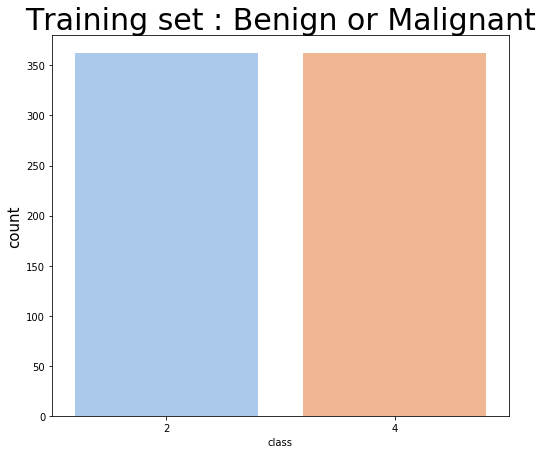

In [1087]:
yy1=pd.DataFrame(y_train_res)
yy1.columns=['class']
plt.rcParams['figure.figsize'] = (18, 7)
plt.subplot(1, 2, 1)
sns.countplot(yy1['class'], palette = 'pastel')
plt.title('Training set : Benign or Malignant', fontsize = 30)
plt.ylabel('count', fontsize = 15)
plt.show()

In [1088]:
# Now Null Accuracy of the model is 50 % 

# Custom KNN after Sampling

In [1089]:
def run():
    classifier = KNNClassifier()
    classifier.fit(X_train_res, y_train_res)
    y_pred1 = classifier.predict(X_test)
    print("My KNN accuracy: ",accuracy(y_test, y_pred1),'%')

In [1090]:
start = time.time()

run()

end = time.time()
time_taken = end - start
print('Time Taken : ',time_taken)


My KNN accuracy:  97.84172661870504 %
Time Taken :  0.7590055465698242


In [1091]:
def run():
    classifier = KNNClassifier()
    classifier.fit(X_train_res, y_train_res)
    y_pred1 = classifier.predict(X_test)
    print ('\n******** Model Performance after Sampling******')
    print("\n My KNN accuracy: ",accuracy(y_test, y_pred1),'%')
    print("\nlength of y -test is :",len(y_test))
    print("length of y -Pred is :",len(y_pred1))
    y_actu = pd.Series(y_test, name='Actual')
    y_pred = pd.Series(y_pred1, name='Predicted')
    df_confusion = pd.crosstab(y_actu, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
    print ('\n******** Model Metrics******')
    print ('\n 1. Confusion Matrix')
    print('\n',df_confusion)
    TN= df_confusion[2][2]
    TP= df_confusion[4][4]
    FP= df_confusion[4][2]
    FN= df_confusion[2][4]
    
    recall = TP /(TP+FN)
    Precision = TP /(TP+FP)
    Specificity = TN/(TN+FP)
    F1score= 2 * ((Precision*recall) /(Precision + recall))
    
    print("\n 2.recall score is :",recall)
    print("\n 3.Precision score is :",Precision)
    print("\n 4.Specificity is :",Specificity)
    print("\n 5. F1score is :",F1score)


# Model Performance merics 

In [1092]:
start = time.time()

run()

end = time.time()
time_taken = end - start
print('\n Time Taken : ',time_taken)


******** Model Performance after Sampling******

 My KNN accuracy:  97.84172661870504 %

length of y -test is : 139
length of y -Pred is : 139

******** Model Metrics******

 1. Confusion Matrix

 Predicted   2   4  All
Actual                
2          93   3   96
4           0  43   43
All        93  46  139

 2.recall score is : 1.0

 3.Precision score is : 0.9347826086956522

 4.Specificity is : 0.96875

 5. F1score is : 0.9662921348314606

 Time Taken :  0.7709705829620361


# SKlearn KNN ALGORITHM AFTER SAMPLING

In [1100]:
print("Before OverSampling, counts of label '2' and newlabeled as 0: {}".format(sum(y_train1==0)))
print("Before OverSampling, counts of label '4'  and newlabeled as 1: {} \n".format(sum(y_train1==1)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train1, y_train1)

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))

Before OverSampling, counts of label '2' and newlabeled as 0: 323
Before OverSampling, counts of label '4'  and newlabeled as 1: 166 

After OverSampling, the shape of train_X: (646, 9)
After OverSampling, the shape of train_y: (646,) 

After OverSampling, counts of label '0': 323
After OverSampling, counts of label '1': 323


In [1102]:
start = time.time()

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors =5)
knn.fit(X_train_res, y_train_res)
y_pred = knn.predict(X_test1)
print('With KNN (K=5) test accuracy is: ',knn.score(X_test1,y_test1))

end = time.time()
time_taken = end - start
print('\n Time Taken : ',time_taken)

With KNN (K=5) test accuracy is:  0.9761904761904762

 Time Taken :  0.01564955711364746


# Finding Best K value for better Accuracy

In [1103]:
neig = np.arange(1, 25)
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(X_train_res,y_train_res)
    # test accuracy
    test_accuracy.append(knn.score(X_test1, y_test1))

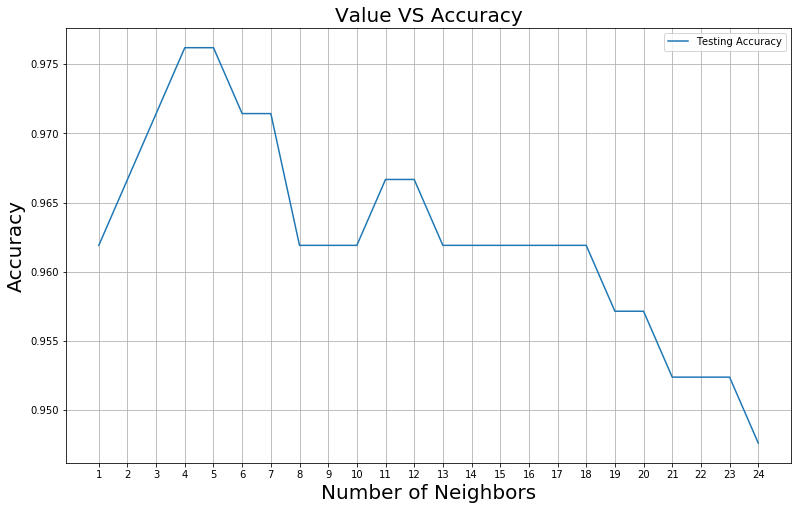

Best accuracy is 0.9761904761904762 with K = 4


In [1104]:
# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.legend()
plt.title('Value VS Accuracy',fontsize=20)
plt.xlabel('Number of Neighbors',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.xticks(neig)
plt.grid()
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

In [612]:
# So ,for Testing data K value is 4 and Best Accuracy is 97.61

# Model Metrics

In [1105]:
from sklearn.metrics import classification_report,confusion_matrix
mat_KNN = confusion_matrix(y_test1,y_pred)
print("KNN model confusion matrix = \n",mat_KNN)

KNN model confusion matrix = 
 [[131   4]
 [  1  74]]


In [1106]:
mat_KNN = classification_report(y_test1,y_pred)
print("KNN model confusion matrix = \n",mat_KNN)

KNN model confusion matrix = 
               precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       135
         1.0       0.95      0.99      0.97        75

    accuracy                           0.98       210
   macro avg       0.97      0.98      0.97       210
weighted avg       0.98      0.98      0.98       210



In [1107]:
from sklearn import metrics
def draw_roc(actual,probs):
    fpr,tpr,thresholds = metrics.roc_curve(actual,probs)
    auc_score=metrics.roc_auc_score(actual,probs)
    plt.figure(figsize=(6,6))
    plt.plot(fpr,tpr,label='ROC curve(area = %0.2f)' %auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False positve rate')
    plt.ylabel('True positve rate')
    plt.title('ROC CURVE')
    plt.legend(loc="lower right")
    plt.show()
    
    return fpr,tpr,thresholds

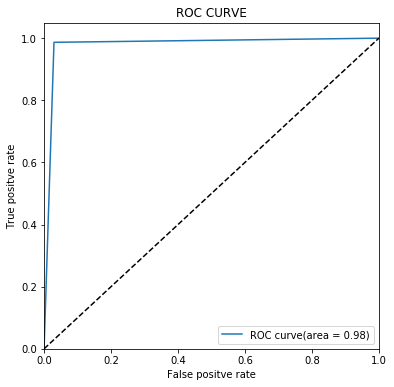

(array([0.        , 0.02962963, 1.        ]),
 array([0.        , 0.98666667, 1.        ]),
 array([2., 1., 0.]))

In [1108]:
draw_roc(y_test1,y_pred)

# Changing the Threshold for Probablities 

In [1113]:
y_pred_prob = knn.predict_proba(X_test1)[:, 1]
y_pred_prob[1:20]

array([0.        , 0.58333333, 0.        , 1.        , 0.        ,
       0.91666667, 0.        , 1.        , 0.54166667, 0.        ,
       0.        , 1.        , 0.91666667, 1.        , 0.        ,
       0.        , 0.95833333, 0.95833333, 0.        ])

Text(0, 0.5, 'Frequency')

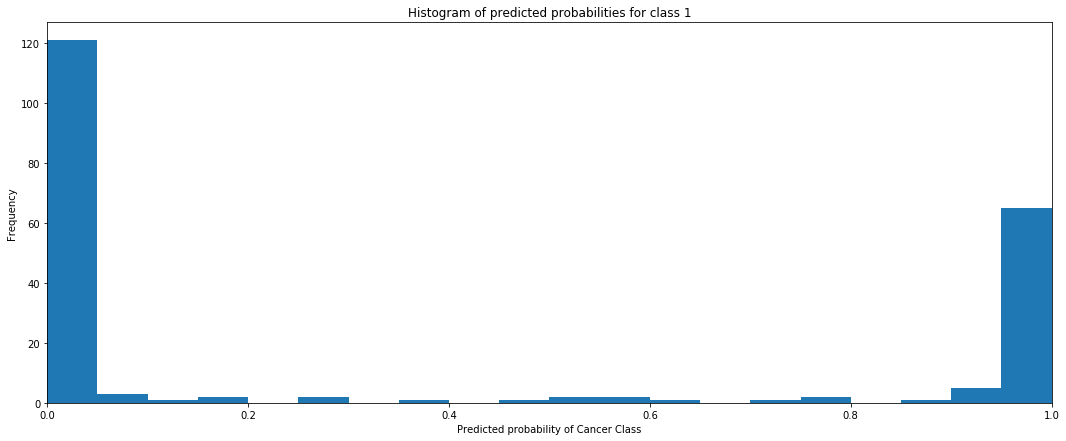

In [1114]:
# histogram of predicted probabilities

plt.hist(y_pred_prob, bins=20)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities for class 1')
plt.xlabel('Predicted probability of Cancer Class')
plt.ylabel('Frequency')

In [1120]:
## Changing the cut off value for prediction
pred_proba_df = pd.DataFrame(knn.predict_proba(X_test1))
threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.6,0.7,0.8,0.9,0.95]
for i in threshold_list:
    print ('\n******** For cutoff = {} ******'.format(i))
    y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    test_accuracy = metrics.accuracy_score(y_test1.as_matrix().reshape(y_test1.as_matrix().size,1),
                                           y_test_pred.iloc[:,1].as_matrix().reshape(y_test_pred.iloc[:,1].as_matrix().size,1))
    print('Model testing accuracy is {:.2f}'.format(test_accuracy))

    print(confusion_matrix(y_test1.as_matrix().reshape(y_test1.as_matrix().size,1),
                           y_test_pred.iloc[:,1].as_matrix().reshape(y_test_pred.iloc[:,1].as_matrix().size,1)))


******** For cutoff = 0.05 ******
Model testing accuracy is 0.92
[[120  15]
 [  1  74]]

******** For cutoff = 0.1 ******
Model testing accuracy is 0.94
[[123  12]
 [  1  74]]

******** For cutoff = 0.15 ******
Model testing accuracy is 0.94
[[124  11]
 [  1  74]]

******** For cutoff = 0.2 ******
Model testing accuracy is 0.95
[[126   9]
 [  1  74]]

******** For cutoff = 0.25 ******
Model testing accuracy is 0.95
[[127   8]
 [  2  73]]

******** For cutoff = 0.3 ******
Model testing accuracy is 0.95
[[127   8]
 [  2  73]]

******** For cutoff = 0.35 ******
Model testing accuracy is 0.95
[[127   8]
 [  2  73]]

******** For cutoff = 0.4 ******
Model testing accuracy is 0.95
[[127   8]
 [  3  72]]

******** For cutoff = 0.45 ******
Model testing accuracy is 0.95
[[127   8]
 [  3  72]]

******** For cutoff = 0.5 ******
Model testing accuracy is 0.95
[[128   7]
 [  4  71]]

******** For cutoff = 0.6 ******
Model testing accuracy is 0.95
[[130   5]
 [  5  70]]

******** For cutoff = 0.7 